### 1) 선형회귀

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/LinearRegressionData.csv')
df.head(3)

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [13]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [14]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

### 2) 선형회귀 시각화

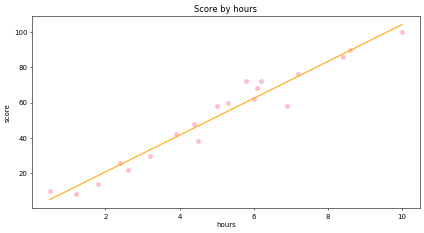

In [21]:
plt.figure(figsize=(10,5), dpi=50)
plt.scatter(X, y, color="pink") # 산점도 그래프
plt.plot(X, y_pred, color="orange")
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [25]:
reg.predict([[9], [8], [5]])

array([93.77478776, 83.33109082, 52.        ])

In [28]:
m = reg.coef_
m

array([10.44369694])

In [29]:
b = reg.intercept_
b

-0.218484702867201

In [30]:
y = m * 9 + b
y

array([93.77478776])

### 3) 데이터 세트 분리

In [33]:
df = pd.read_csv('./data/LinearRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [36]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [37]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [38]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

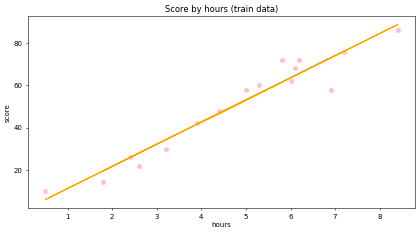

In [40]:
y_pred = reg.predict(X_train)
plt.figure(figsize=(10,5), dpi=50)
plt.scatter(X_train, y_train, color="pink") # 산점도 그래프
plt.plot(X_train, y_pred, color="orange")
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

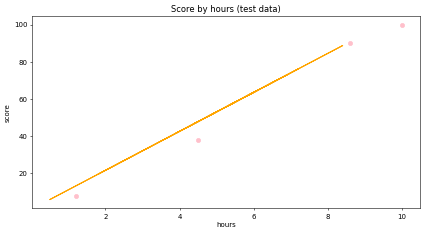

In [41]:
plt.figure(figsize=(10,5), dpi=50)
plt.scatter(X_test, y_test, color="pink") # 산점도 그래프
plt.plot(X_train, y_pred, color="orange")
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [42]:
reg.coef_

array([10.49161294])

In [43]:
reg.intercept_

0.6115562905169369

In [44]:
reg.score(X_train, y_train)

0.9356663661221668

In [45]:
reg.score(X_test, y_test)

0.9727616474310156

### 4) 경사하강법

In [46]:
X_train, y_train

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64))

In [67]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=5, eta0=0.001, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.


c:\Users\kosmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.001, max_iter=5, random_state=0, verbose=1)

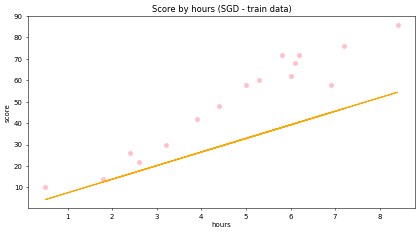

In [68]:
y_pred = sr.predict(X_train)
plt.figure(figsize=(10,5), dpi=50)
plt.scatter(X_train, y_train, color="pink") # 산점도 그래프
plt.plot(X_train, y_pred, color="orange")
plt.title('Score by hours (SGD - train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [69]:
sr.score(X_train, y_train)

0.09172908681241998

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [73]:
df = pd.read_csv('./data/LinearRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [74]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [75]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [76]:
reg.predict([[9]])

array([93.77478776])